**Convolutional Autoencoder - Lab Session**

Learning outcome of the session

● Trainees will learn how to build a convolutional autoencoder which is a better model than dense autoencoder for images. MNIST dataset is used here.

In [ ]:
# import the required files
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.random.set_seed(42)

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="Greys", interpolation="nearest")
  plt.axis("off")

In [ ]:
# function to display reconstructed image along with original image
def show_reconstructions(model, n_test_images = 2):
  reconstructions = model.predict(X_test[:n_test_images])
  fig = plt.figure(figsize=(8, 3 * n_test_images))
  for image_index in range(n_test_images):
    plt.subplot(n_test_images, 2, image_index * 2 + 1)
    plot_image(X_test[image_index])
    plt.subplot(n_test_images, 2, image_index * 2 + 2)
    plot_image(reconstructions[image_index])

In [ ]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
# load and normalize data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# define encoder
conv_encoder = keras.models.Sequential([
  keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
  keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="relu"),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="relu"),
  keras.layers.MaxPool2D(pool_size=2),
  keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="relu"),
  keras.layers.MaxPool2D(pool_size=2)
])

In [ ]:
# define decoder
conv_decoder = keras.models.Sequential([
  keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID",
  activation="relu", input_shape=[3, 3, 64]),
  keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME",
  activation="relu"),
  keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME",
  activation="sigmoid"), keras.layers.Reshape([28, 28])
])

In [ ]:
# create the autoencoder model
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

In [ ]:
conv_ae.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3, 3, 64)          23296     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            23233     
                                                                 
Total params: 46,529
Trainable params: 46,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the model with the required loss function and optimizer
conv_ae.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
# train the model
history_convAE = conv_ae.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.1704 - accuracy: 0.3204
Epoch 2/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1387 - accuracy: 0.4164
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1376 - accuracy: 0.4245
Epoch 4/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1243 - accuracy: 0.4672
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1317 - accuracy: 0.4459


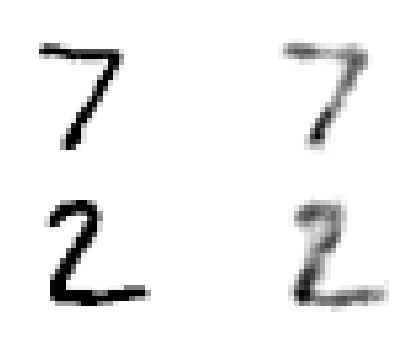

In [ ]:
show_reconstructions(conv_ae)
plt.show()